#  Latent Dirichlet Allocation (LDA)



<a href="https://github.com/linogaliana/python-datascientist/blob/master//__w/python-datascientist/python-datascientist/notebooks/course/NLP/03_lda.ipynb" class="github"><i class="fab fa-github"></i></a>
[![Download](https://img.shields.io/badge/Download-Notebook-important?logo=Jupyter)](https://downgit.github.io/#/home?url=https://github.com/linogaliana/python-datascientist/blob/master//__w/python-datascientist/python-datascientist/notebooks/course/NLP/03_lda.ipynb)
[![nbviewer](https://img.shields.io/badge/Visualize-nbviewer-blue?logo=Jupyter)](https://nbviewer.jupyter.org/github/linogaliana/python-datascientist/blob/master//__w/python-datascientist/python-datascientist/notebooks/course/NLP/03_lda.ipynb)
[![Onyxia](https://img.shields.io/badge/SSPcloud-Tester%20via%20SSP--cloud-informational&color=yellow?logo=Python)](https://datalab.sspcloud.fr/launcher/inseefrlab-helm-charts-datascience/jupyter?onyxia.friendlyName=«python-datascientist»&resources.requests.memory=«4Gi»&security.allowlist.enabled=false&init.personalInit=«https://raw.githubusercontent.com/linogaliana/python-datascientist/master/init_onyxia.sh»)
<br>
[![Binder](https://img.shields.io/badge/Launch-Binder-E66581.svg?logo=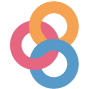)](https://mybinder.org/v2/gh/linogaliana/python-datascientist/master?filepath=/__w/python-datascientist/python-datascientist/notebooks/course/NLP/03_lda.ipynb)
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](http://colab.research.google.com/github/linogaliana/python-datascientist/blob/master//__w/python-datascientist/python-datascientist/notebooks/course/NLP/03_lda.ipynb)
[![githubdev](https://open.vscode.dev/badges/open-in-vscode.svg)](https://github.dev/linogaliana/python-datascientist//__w/python-datascientist/python-datascientist/notebooks/course/NLP/03_lda.ipynb)



Cette page approfondit continue les exercices présentés dans la 
[section précédente](#nlpexo). 
On va ainsi continuer notre exploration de la littérature anglophones:

* Edgar Allan Poe, (EAP) ;
* HP Lovecraft (HPL) ;
* Mary Wollstonecraft Shelley (MWS).

Les données sont disponibles ici : [spooky.csv](https://github.com/GU4243-ADS/spring2018-project1-ginnyqg/blob/master/data/spooky.csv) et peuvent être requétées via l'url 
<https://github.com/GU4243-ADS/spring2018-project1-ginnyqg/raw/master/data/spooky.csv>.

Le but va être dans un premier temps de regarder dans le détail les termes les plus fréquents utilisés par les auteurs, de les représenter graphiquement puis on va ensuite essayer de prédire quel texte correspond à quel auteur à partir d'un modèle `Word2Vec`.

Ce notebook librement inspiré de  : 

* https://www.kaggle.com/enerrio/scary-nlp-with-spacy-and-keras
* https://github.com/GU4243-ADS/spring2018-project1-ginnyqg
* https://www.kaggle.com/meiyizi/spooky-nlp-and-topic-modelling-tutorial/notebook

La LDA est une technique d'estimation bayésienne.
Le [poly d'Alberto Brietti](http://alberto.bietti.me/files/rapport-lda.pdf)
sur le sujet constitue une très bonne ressource pour comprendre
les fondements de cette technique. 

## Librairies nécessaires

Cette page évoquera, les principales librairies pour faire du NLP, notamment: 

* [WordCloud](https://github.com/amueller/word_cloud)
* [nltk](https://www.nltk.org/)
* [spacy](https://spacy.io/)
* [Keras](https://keras.io/)
* [TensorFlow](https://www.tensorflow.org/)

Comme dans la [partie précédente](#nlpexo), il faut télécharger quelques
éléments pour que `NTLK` puisse fonctionner correctement. Pour cela, faire:

~~~python
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('genesis')
nltk.download('wordnet')
~~~

La liste des modules à importer est assez longue, la voici:


## Données utilisées

*Si vous avez déjà lu la section précédente et importé les données, vous
pouvez passer à la section suivante*

Le code suivant permet d'importer le jeu de données `spooky`: 

In [ ]:
import pandas as pd

url='https://github.com/GU4243-ADS/spring2018-project1-ginnyqg/raw/master/data/spooky.csv'
import pandas as pd
train = pd.read_csv(url,
                    encoding='latin-1')
train.columns = train.columns.str.capitalize()
                    
train['ID'] = train['Id'].str.replace("id","")
train = train.set_index('Id')

Le jeu de données met ainsi en regard un auteur avec une phrase qu'il a écrite:

```
##                                                       Text Author     ID
## Id                                                                      
## id26305  This process, however, afforded me no means of...    EAP  26305
## id17569  It never once occurred to me that the fumbling...    HPL  17569
## id11008  In his left hand was a gold snuff box, from wh...    EAP  11008
## id27763  How lovely is spring As we looked from Windsor...    MWS  27763
## id12958  Finding nothing else, not even gold, the Super...    HPL  12958
```

Les étapes de *preprocessing* sont expliquées au [chapitre précédent](#nlpexo). On applique les étapes suivantes:

1. Tokeniser
2. Retirer la ponctuation et les stopwords
3. Lemmatiser le texte

```
## Error in py_call_impl(callable, dots$args, dots$keywords): LookupError: 
## **********************************************************************
##   Resource [93mwordnet[0m not found.
##   Please use the NLTK Downloader to obtain the resource:
## 
##   [31m>>> import nltk
##   >>> nltk.download('wordnet')
##   [0m
##   For more information see: https://www.nltk.org/data.html
## 
##   Attempted to load [93mcorpora/wordnet[0m
## 
##   Searched in:
##     - '/github/home/nltk_data'
##     - '/opt/conda/envs/python-ENSAE/nltk_data'
##     - '/opt/conda/envs/python-ENSAE/share/nltk_data'
##     - '/opt/conda/envs/python-ENSAE/lib/nltk_data'
##     - '/usr/share/nltk_data'
##     - '/usr/local/share/nltk_data'
##     - '/usr/lib/nltk_data'
##     - '/usr/local/lib/nltk_data'
## **********************************************************************
## 
## 
## Detailed traceback: 
##   File "<string>", line 1, in <module>
##   File "/opt/conda/envs/python-ENSAE/lib/python3.9/site-packages/pandas/core/series.py", line 4357, in apply
##     return SeriesApply(self, func, convert_dtype, args, kwargs).apply()
##   File "/opt/conda/envs/python-ENSAE/lib/python3.9/site-packages/pandas/core/apply.py", line 1043, in apply
##     return self.apply_standard()
##   File "/opt/conda/envs/python-ENSAE/lib/python3.9/site-packages/pandas/core/apply.py", line 1098, in apply_standard
##     mapped = lib.map_infer(
##   File "pandas/_libs/lib.pyx", line 2859, in pandas._libs.lib.map_infer
##   File "<string>", line 2, in <lambda>
##   File "<string>", line 2, in <listcomp>
##   File "/opt/conda/envs/python-ENSAE/lib/python3.9/site-packages/nltk/stem/wordnet.py", line 45, in lemmatize
##     lemmas = wn._morphy(word, pos)
##   File "/opt/conda/envs/python-ENSAE/lib/python3.9/site-packages/nltk/corpus/util.py", line 121, in __getattr__
##     self.__load()
##   File "/opt/conda/envs/python-ENSAE/lib/python3.9/site-packages/nltk/corpus/util.py", line 86, in __load
##     raise e
##   File "/opt/conda/envs/python-ENSAE/lib/python3.9/site-packages/nltk/corpus/util.py", line 81, in __load
##     root = nltk.data.find(f"{self.subdir}/{self.__name}")
##   File "/opt/conda/envs/python-ENSAE/lib/python3.9/site-packages/nltk/data.py", line 583, in find
##     raise LookupError(resource_not_found)
```

```
## ID     Author
## 00001  MWS       [Idris, was, well, content, with, this, resolv...
## 00002  HPL       [I, was, faint, even, fainter, than, the, hate...
## dtype: object
```


## Principe de la LDA (Latent Dirichlet Allocation)

Le modèle __Latent Dirichlet Allocation (LDA)__ est un modèle probabiliste génératif qui permet
de décrire des collections de documents de texte ou d’autres types de données discrètes. LDA fait
partie d’une catégorie de modèles appelés _“topic models”_, qui cherchent à découvrir des structures
thématiques cachées dans des vastes archives de documents.

Ceci permet d’obtenir des méthodes
efficaces pour le traitement et l’organisation des documents de ces archives: organisation automatique
des documents par sujet, recherche, compréhension et analyse du texte, ou même résumer des
textes. 

Aujourd’hui, ce genre de méthodes s’utilisent fréquemment dans le web, par exemple pour
analyser des ensemble d’articles d’actualité, les regrouper par sujet, faire de la recommendation
d’articles, etc. 

La LDA est une méthode qui considère les corpus comme des __mélanges__ de sujets et
de mots. Chaque document peut être représenté comme le résultat d'un mélange :

* de sujets
* et, au sein de ces sujets, d'un choix de mots.

L’estimation des
paramètres de la LDA passe par l’estimation des distributions des variables
latentes à partir des données observées (*posterior inference*). 
Mathématiquement, on peut se représenter la LDA comme une 
technique de maximisation de *log vraisemblance* avec un algorithme EM (*expectation maximisation*)
dans un modèle de mélange.

La matrice termes-documents qui sert de point de départ est la suivante:

|     | word_1 | word_2 | word_3 | ... | word_J |
|---- |--------|--------|--------|-----|--------|
|doc_1| 3      | 0      | 1      | ... | 0      |
| ... | ...    | ...    | ...    | ... | ...    |
|doc_N| 1      | 0      | 0      | ... | 5      |

La LDA consiste à transformer cette matrice *sparse*
(creuse en Français) document-terme en deux matrices de moindre dimension:

1. Une matrice document-sujet
2. Une matrice sujet-mots

On dit que cette matrice est sparse car elle contient principalement des 0. En effet, un document n'utilise qu'une partie mineure du vocabulaire complet. 

En notant $K_i$ le sujet $i$. On obtient donc

* Une __matrice document-sujet__ ayant la structure suivante:

|     | K_1 | K_2 | K_3 | ... | K_M |
|---- |--------|--------|--------|-----|--------|
|doc_1| 1      | 0      | 1      | ... | 0      |
| ... | ...    | ...    | ...    | ... | ...    |
|doc_N| 1      | 1      | 1      | ... | 0      |

* Une __matrice sujets-mots__ ayant la structure suivante:

|     | word_1 | word_2 | word_3 | ... | word_J |
|---- |--------|--------|--------|-----|--------|
|K_1| 1      | 0      | 0      | ... | 0      |
| ... | ...    | ...    | ...    | ... | ...    |
|K_M| 1      | 1      | 1      | ... | 0      |

Ces deux matrices ont l'interprétation suivante :

* La première nous renseigne sur la présence d'un sujet dans un document
* La seconde nous renseigne sur la présence d'un mot dans un sujet

En fait, le principe de la LDA est de construire ces deux matrices à partir des fréquences d'apparition des mots dans le texte. 

On va se concentrer sur Edgar Allan Poe. 

**Détails à venir**


```
## Error in py_call_impl(callable, dots$args, dots$keywords): KeyError: 'Author'
## 
## Detailed traceback: 
##   File "<string>", line 1, in <module>
##   File "/opt/conda/envs/python-ENSAE/lib/python3.9/site-packages/pandas/core/series.py", line 942, in __getitem__
##     return self._get_value(key)
##   File "/opt/conda/envs/python-ENSAE/lib/python3.9/site-packages/pandas/core/series.py", line 1051, in _get_value
##     loc = self.index.get_loc(label)
##   File "/opt/conda/envs/python-ENSAE/lib/python3.9/site-packages/pandas/core/indexes/multi.py", line 2922, in get_loc
##     loc = self._get_level_indexer(key, level=0)
##   File "/opt/conda/envs/python-ENSAE/lib/python3.9/site-packages/pandas/core/indexes/multi.py", line 3204, in _get_level_indexer
##     idx = self._get_loc_single_level_index(level_index, key)
##   File "/opt/conda/envs/python-ENSAE/lib/python3.9/site-packages/pandas/core/indexes/multi.py", line 2855, in _get_loc_single_level_index
##     return level_index.get_loc(key)
##   File "/opt/conda/envs/python-ENSAE/lib/python3.9/site-packages/pandas/core/indexes/base.py", line 3363, in get_loc
##     raise KeyError(key) from err
```


```
## Error in py_call_impl(callable, dots$args, dots$keywords): NameError: name 'corpus' is not defined
## 
## Detailed traceback: 
##   File "<string>", line 1, in <module>
```

```
## Error in py_call_impl(callable, dots$args, dots$keywords): NameError: name 'count_data' is not defined
## 
## Detailed traceback: 
##   File "<string>", line 1, in <module>
```

```
## Topics found via LDA:
```

```
## Error in py_call_impl(callable, dots$args, dots$keywords): NotFittedError: Vocabulary not fitted or provided
## 
## Detailed traceback: 
##   File "<string>", line 1, in <module>
##   File "<string>", line 2, in print_topics
##   File "/opt/conda/envs/python-ENSAE/lib/python3.9/site-packages/sklearn/feature_extraction/text.py", line 1295, in get_feature_names
##     self._check_vocabulary()
##   File "/opt/conda/envs/python-ENSAE/lib/python3.9/site-packages/sklearn/feature_extraction/text.py", line 467, in _check_vocabulary
##     raise NotFittedError("Vocabulary not fitted or provided")
```


In [ ]:
import pyLDAvis
import pyLDAvis.sklearn

# pyLDAvis.enable_notebook()
pyLDAvis.sklearn.prepare(lda, count_data, count_vectorizer, n_jobs = 1)

```
## /opt/conda/envs/python-ENSAE/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
##   from imp import reload
```

```
## Error in py_call_impl(callable, dots$args, dots$keywords): NameError: name 'count_data' is not defined
## 
## Detailed traceback: 
##   File "<string>", line 2, in <module>
```



Le module `pyLDAvis` offre quelques visualisations bien pratiques lorsqu'on
désire représenter de manière synthétique les résultats d'une LDA

Dans un *notebook*

~~~python
import pyLDAvis.sklearn

pyLDAvis.enable_notebook()
~~~

Pour les utilisateurs de Windows, il est nécessaire d'ajouter l'argument
`n_jobs = 1`. Sinon, `python` tente d'entraîner le modèle avec de la 
parallélisation. Le problème est que les processus sont des FORKs, ce que
Windows ne supporte pas. Sur un système unix, on peut se passer de cet
argument. 

La représentation sous forme de liste de mots n'est pas la plus pratique. 

On peut essayer de se représenter un *wordcloud* de chaque sujet pour mieux voir si cette piste est pertinente:

```
## Error in py_call_impl(callable, dots$args, dots$keywords): NotFittedError: Vocabulary not fitted or provided
## 
## Detailed traceback: 
##   File "<string>", line 1, in <module>
##   File "/opt/conda/envs/python-ENSAE/lib/python3.9/site-packages/sklearn/feature_extraction/text.py", line 1295, in get_feature_names
##     self._check_vocabulary()
##   File "/opt/conda/envs/python-ENSAE/lib/python3.9/site-packages/sklearn/feature_extraction/text.py", line 467, in _check_vocabulary
##     raise NotFittedError("Vocabulary not fitted or provided")
```

```
## Error in py_call_impl(callable, dots$args, dots$keywords): NameError: name 'tf_feature_names' is not defined
## 
## Detailed traceback: 
##   File "<string>", line 1, in <module>
```



# Références

* Le [poly d'Alberto Brietti](http://alberto.bietti.me/files/rapport-lda.pdf)